In [1]:
from langchain_mistralai import ChatMistralAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from typing import TypedDict,List,Annotated
from statistics import mean
from pydantic import BaseModel,Field
from operator import add
import os
from langsmith.wrappers import wrap_anthropic

load_dotenv()

True

In [2]:
google=ChatGoogleGenerativeAI(api_key=os.getenv("google"),model='gemini-2.5-flash')

In [3]:
model=ChatMistralAI(api_key=os.getenv("mistral_ai"))

In [4]:
class EVALUATION(BaseModel):
    feedback:str=Field(...,description='Detailed feedback on the basis of the essay')
    score: int = Field(description='Score out of 10', ge=0, le=10,default=0)
    improvement_tips:str=Field(...,description='Detailed improvement tips on the basis of the essay')

structured_model=model.with_structured_output(EVALUATION)
google_output=google.with_structured_output(EVALUATION)

In [5]:
essay='Title: The Impact and Implications of Artificial Intelligence\n\nArtificial Intelligence (AI) is a rapidly evolving field that has the potential to transform every aspect of human life, from transportation and healthcare to education and entertainment. As we stand on the precipice of an AI revolution, it is essential to examine its impact and implications on society.\n\nAt its core, AI is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning, reasoning, problem-solving, perception, and language understanding. With the help of AI, machines can perform tasks that typically require human intelligence, such as recognizing speech, making decisions, and solving complex problems.\n\nOne of the most significant impacts of AI is its potential to drive economic growth and productivity. According to a report by McKinsey Global Institute, AI could contribute up to $15.7 trillion to the global economy by 2030, equivalent to the combined output of China and India today. AI can help businesses automate routine tasks, optimize operations, and make better decisions, leading to significant cost savings and increased efficiency.\n\nHowever, the rise of AI also raises important ethical and social concerns. One of the most pressing issues is the potential for AI to exacerbate existing inequalities and create new ones. For instance, AI-powered algorithms have been found to perpetuate gender and racial biases, leading to discriminatory outcomes in areas such as hiring and lending. Moreover, the automation of jobs could lead to significant job losses, especially in low-skilled occupations, potentially increasing income inequality and social unrest.\n\nAnother concern is the lack of transparency and accountability in AI systems. As AI becomes more complex and autonomous, it becomes increasingly difficult to understand how decisions are made, leading to a "black box" problem. This lack of transparency raises concerns about the responsible use of AI, particularly in critical areas such as healthcare, finance, and criminal justice.\n\nTo address these concerns, it is essential to establish clear guidelines and regulations for the development and deployment of AI. Governments and international organizations should work together to create a framework that ensures the ethical and responsible use of AI, while also promoting innovation and economic growth.\n\nIn addition, there is a need for greater education and awareness about AI. While AI has the potential to create significant benefits, it also has the potential to cause harm if used irresponsibly. By educating the public about AI, we can help ensure that people are equipped to make informed decisions about its use and to mitigate its risks.\n\nIn conclusion, AI is a powerful technology that has the potential to transform our world in profound ways. While it offers significant opportunities for economic growth and productivity, it also poses important ethical and social challenges. To realize the full potential of AI, we must work together to establish clear guidelines and regulations, promote education and awareness, and ensure that its benefits are shared fairly among all members of society. With careful planning and collaboration, we can harness the power of AI to build a better future for all.'

In [6]:
prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {essay}'

google_output.invoke(prompt).improvement_tips

'While the language is generally excellent, there are opportunities for minor refinements. Some sentences could be made more concise to enhance flow and impact. Additionally, varying sentence structures more deliberately could further improve readability and engagement, preventing a slight monotony in rhythm. Ensuring all topic sentences are highly explicit could also strengthen paragraph cohesion.'

In [7]:
class UPSC(TypedDict):
    clarity_of_thoughts_feedback:str
    essay:str
    language_feedback:str
    analysis_feedback:str
    overall_feedback:str
    tips:Annotated[list,add] 
    score:Annotated[list[int],add]
    

In [8]:
graph=StateGraph(UPSC)

In [9]:
def COT(state:UPSC)->UPSC['clairty_of_thoughts_feedback']:
    essay='Title: The Impact and Implications of Artificial Intelligence\n\nArtificial Intelligence (AI) is a rapidly evolving field that has the potential to transform every aspect of human life, from transportation and healthcare to education and entertainment. As we stand on the precipice of an AI revolution, it is essential to examine its impact and implications on society.\n\nAt its core, AI is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning, reasoning, problem-solving, perception, and language understanding. With the help of AI, machines can perform tasks that typically require human intelligence, such as recognizing speech, making decisions, and solving complex problems.\n\nOne of the most significant impacts of AI is its potential to drive economic growth and productivity. According to a report by McKinsey Global Institute, AI could contribute up to $15.7 trillion to the global economy by 2030, equivalent to the combined output of China and India today. AI can help businesses automate routine tasks, optimize operations, and make better decisions, leading to significant cost savings and increased efficiency.\n\nHowever, the rise of AI also raises important ethical and social concerns. One of the most pressing issues is the potential for AI to exacerbate existing inequalities and create new ones. For instance, AI-powered algorithms have been found to perpetuate gender and racial biases, leading to discriminatory outcomes in areas such as hiring and lending. Moreover, the automation of jobs could lead to significant job losses, especially in low-skilled occupations, potentially increasing income inequality and social unrest.\n\nAnother concern is the lack of transparency and accountability in AI systems. As AI becomes more complex and autonomous, it becomes increasingly difficult to understand how decisions are made, leading to a "black box" problem. This lack of transparency raises concerns about the responsible use of AI, particularly in critical areas such as healthcare, finance, and criminal justice.\n\nTo address these concerns, it is essential to establish clear guidelines and regulations for the development and deployment of AI. Governments and international organizations should work together to create a framework that ensures the ethical and responsible use of AI, while also promoting innovation and economic growth.\n\nIn addition, there is a need for greater education and awareness about AI. While AI has the potential to create significant benefits, it also has the potential to cause harm if used irresponsibly. By educating the public about AI, we can help ensure that people are equipped to make informed decisions about its use and to mitigate its risks.\n\nIn conclusion, AI is a powerful technology that has the potential to transform our world in profound ways. While it offers significant opportunities for economic growth and productivity, it also poses important ethical and social challenges. To realize the full potential of AI, we must work together to establish clear guidelines and regulations, promote education and awareness, and ensure that its benefits are shared fairly among all members of society. With careful planning and collaboration, we can harness the power of AI to build a better future for all.'
    state['essay']=essay
    prompt = f'Evaluate the clarity of thoughts of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    cot=google_output.invoke(prompt).feedback
    score=google_output.invoke(prompt).score
    tips=google_output.invoke(prompt).improvement_tips
    return {'clarity_of_thoughts_feedback':cot,'score':[score],'tips':[tips]}

def Language(state:UPSC)->UPSC['language_feedback']:
    prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    language=google_output.invoke(prompt).feedback
    score=google_output.invoke(prompt).score
    lang_tips=google_output.invoke(prompt).improvement_tips
    return {'language_feedback':language,'score':[score],'tips':[lang_tips]}

def Analysis(state:UPSC)->UPSC['analysis_feedback']:    
    prompt = f'Evaluate and do an depth analysis quality of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    analysis=google_output.invoke(prompt).feedback
    score=google_output.invoke(prompt).score
    analysis_tips=google_output.invoke(prompt).improvement_tips
    return {'analysis_feedback':analysis,'score':[score],'tips':[analysis_tips]}


In [10]:
def overall(state:UPSC)->UPSC['overall_feedback']:
     # summary feedback
    prompt = f'Based on the following feedbacks create a summarized feedback \n language feedback - {state["language_feedback"]} \n depth of analysis feedback - {state["analysis_feedback"]} \n clarity of thought feedback - {state["clarity_of_thoughts_feedback"]}'
    overall_feedback = model.invoke(prompt).content
    avg=lambda x:mean(x)
    avg_score=avg(state['score'])
    return {'overall_feedback':overall_feedback,'avg_score':avg_score}

def overall_tips(state:UPSC)->UPSC['tips']:
    prompt=f"based on the tips on t \n {state['tips']} \n give a feedback on the overall essat give a solid tip"
    tips=model.invoke(prompt).content
    return {'tips':[tips]}

In [11]:
graph.add_node('overaall',overall_tips)

In [12]:
#adding nodes
graph.add_node('COT',COT)
graph.add_node('Language',Language)
graph.add_node('Analysis',Analysis)
graph.add_node('Overall',overall)

In [13]:
#adding edges

graph.add_edge(START,'COT')
graph.add_edge(START,'Language')
graph.add_edge(START,'Analysis')
graph.add_edge('COT','Overall')
graph.add_edge('Language','Overall')
graph.add_edge('Analysis','Overall')

graph.add_edge('COT','overaall')
graph.add_edge('Language','overaall')
graph.add_edge('Analysis','overaall')

graph.add_edge('Overall',END)


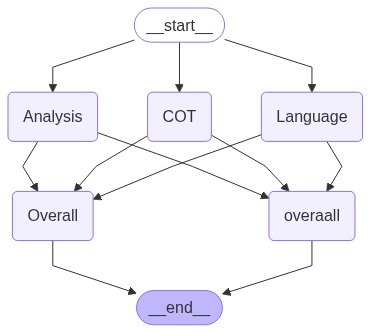

In [14]:
WORKFLOW=graph.compile()
WORKFLOW

In [15]:
initial_state={"essay":essay}
WORKFLOW.invoke(initial_state)

{'clarity_of_thoughts_feedback': 'The essay demonstrates exceptional clarity of thought. The introduction effectively sets the stage, and the definition of AI is precise and easy to understand. The author skillfully presents both the positive economic impacts and the significant ethical and social concerns, providing clear examples and logical reasoning for each point. The flow from problem identification to proposed solutions (guidelines, education) is seamless and coherent. Each paragraph focuses on a distinct idea, contributing to a well-structured and highly readable argument. The language used is consistently clear, concise, and articulate, making the complex topic of AI accessible to the reader.',
 'essay': 'Title: The Impact and Implications of Artificial Intelligence\n\nArtificial Intelligence (AI) is a rapidly evolving field that has the potential to transform every aspect of human life, from transportation and healthcare to education and entertainment. As we stand on the prec